# Compare Online Classifiers

This notebook uses the float framework to load a binary classification data set and train two classifiers, namely a HoeffdingTree classifier and a Perceptron classifier, both from the scikit-multiflow library. This is done using float's PrequentialPipeline. The zero-one loss, the variability to noise, and the mean drift performance deterioration are used as evaluation metrics and are plotted over all time steps. The mean metric values of the two classifiers are compared against each other in a spider chart.

In [1]:
import os
os.chdir(os.getcwd()[:-6])

In [2]:
from float.data import DataLoader
from float.pipeline import PrequentialPipeline
from float.prediction.evaluation import PredictionEvaluator
from float.prediction.evaluation.measures import noise_variability, mean_drift_performance_deterioration
from float.prediction.skmultiflow import SkmultiflowClassifier
from float.visualization import plot, spider_chart
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss
from skmultiflow.neural_networks.perceptron import PerceptronMask
from skmultiflow.trees import HoeffdingTreeClassifier

In [3]:
data_loader = DataLoader(path='float/data/datasets/spambase.csv', target_col=-1)

known_drifts = [round(data_loader.stream.n_samples * 0.2), round(data_loader.stream.n_samples * 0.4),
                round(data_loader.stream.n_samples * 0.6), round(data_loader.stream.n_samples * 0.8)]

predictors = [SkmultiflowClassifier(HoeffdingTreeClassifier(), data_loader.stream.target_values, reset_after_drift=True),
              SkmultiflowClassifier(PerceptronMask(), data_loader.stream.target_values, reset_after_drift=True)]
pred_evaluators = [PredictionEvaluator([zero_one_loss, noise_variability, mean_drift_performance_deterioration],
                                       decay_rate=0.1, window_size=10, known_drifts=known_drifts, batch_size=10) 
                   for i in range(2)]

for i in range(2):
    prequential_pipeline = prequential_pipeline = PrequentialPipeline(data_loader=data_loader,
                                                                  predictor=predictors[i],
                                                                  prediction_evaluator=pred_evaluators[i],
                                                                  n_max=data_loader.stream.n_samples)
    prequential_pipeline.run()

Pretrain the predictor with 100 observation(s).
[====================] 100%
################################## SUMMARY ##################################
Evaluation has finished after 70.23436689376831s
Data Set float/data/datasets/spambase.csv
The pipeline has processed 4601 instances in total, using batches of size 1.
----------------------
Prediction:
| Model                   |   Avg. Test Comp. Time |   Avg. Train Comp. Time |   Avg. zero_one_loss |   Avg. noise_variability |   Avg. mean_drift_performance_deterioration |
|-------------------------|------------------------|-------------------------|----------------------|--------------------------|---------------------------------------------|
| HoeffdingTreeClassifier |            0.000713437 |             0.000990059 |             0.180667 |                 0.241133 |                                  -0.0738785 |
#############################################################################
Pretrain the predictor with 100 observat

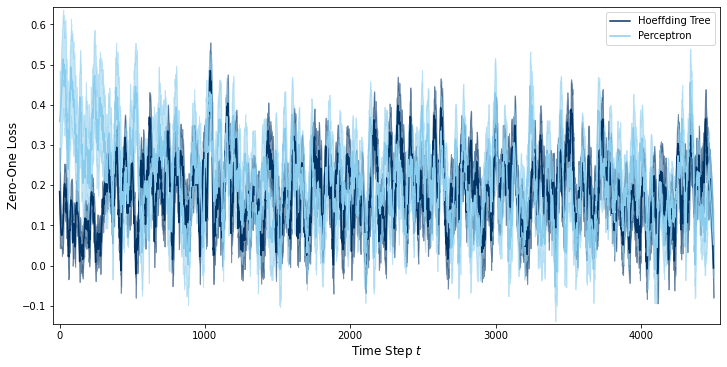

In [4]:
plot(measures=[pred_evaluators[0].result['zero_one_loss']['measures'], pred_evaluators[1].result['zero_one_loss']['measures']],
     variances=[pred_evaluators[0].result['zero_one_loss']['var'], pred_evaluators[1].result['zero_one_loss']['var']],
     labels=['Hoeffding Tree', 'Perceptron'],
     measure_name='Zero-One Loss',
     measure_type='prediction',
     smooth_curve=True)
plt.show()

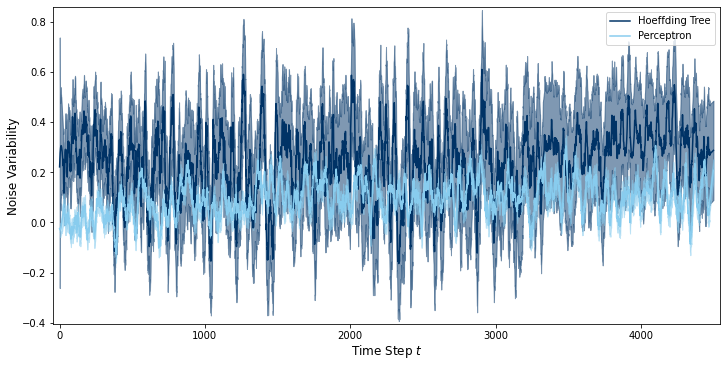

In [5]:
plot(measures=[pred_evaluators[0].result['noise_variability']['measures'], pred_evaluators[1].result['noise_variability']['measures']],
     variances=[pred_evaluators[0].result['noise_variability']['var'], pred_evaluators[1].result['noise_variability']['var']],
     labels=['Hoeffding Tree', 'Perceptron'],
     measure_name='Noise Variability',
     measure_type='prediction',
     smooth_curve=True)
plt.show()

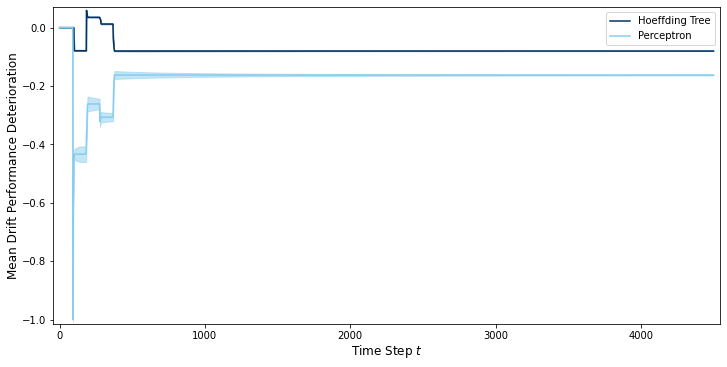

In [6]:
plot(measures=[pred_evaluators[0].result['mean_drift_performance_deterioration']['measures'], pred_evaluators[1].result['mean_drift_performance_deterioration']['measures']],
     variances=[pred_evaluators[0].result['mean_drift_performance_deterioration']['var'], pred_evaluators[1].result['mean_drift_performance_deterioration']['var']],
     labels=['Hoeffding Tree', 'Perceptron'],
     measure_name='Mean Drift Performance Deterioration',
     measure_type='prediction',
     smooth_curve=False)
plt.show()

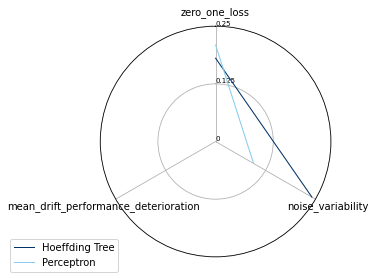

In [7]:
spider_chart(measures=[[pred_evaluators[0].result['zero_one_loss']['mean'][-1], pred_evaluators[0].result['noise_variability']['mean'][-1],
                        pred_evaluators[0].result['mean_drift_performance_deterioration']['mean'][-1]],
                       [pred_evaluators[1].result['zero_one_loss']['mean'][-1], pred_evaluators[1].result['noise_variability']['mean'][-1],
                        pred_evaluators[1].result['mean_drift_performance_deterioration']['mean'][-1]]
                       ],
             labels=['Hoeffding Tree', 'Perceptron'],
             measure_names=['zero_one_loss', 'noise_variability', 'mean_drift_performance_deterioration'])
plt.show()
